# Monte Carlo Integration

In this document, I will write a function to perform Monte Carlo Integration on 2D and 3D shapes. The purpose of this project is to explore how Monte Carlo methods can be used in Integration. 

## 2D Monte Carlo Simulation vs. Integration
Here I am making two different methods of determining the area under a 2d curve. The first method is a "Hit or miss" method, where points will be randomly chosen in a bounding box around the function f(x) over the interval $[a, b]$. If they land within the function (less than f(x)), then they will be counted as part of the area under the curve. If they do not, they will be counted outside the function. 

Because the area under the curve will be proportional to the area of the bounding box, the total area under the curve can be represented as $$A_{curve}\approx A_{bound} * \frac{n_{in-bounds}}{n_{out-bounds}}$$ 




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.integrate import quad
from scipy import optimize

In [2]:
def f_a(x): #sample function
    return -0.1 *((x-4)**4) + 0.6*((x-4)**3) + 1

In [3]:
X_a = np.linspace(-1, 12, 200)
print(X_a.shape)

(200,)


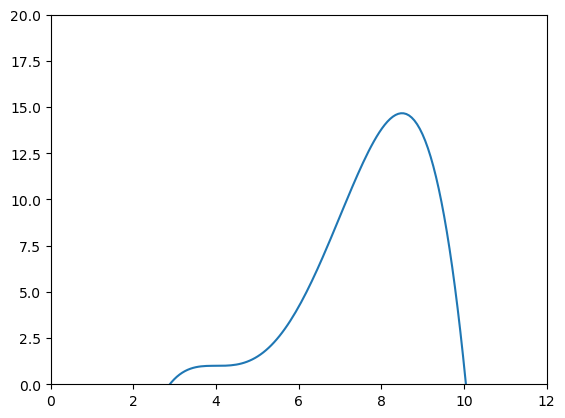

In [4]:
plt.plot(X_a, f_a(X_a))
plt.xlim(0, 12)
plt.ylim(0, 20)
plt.show()

In [5]:
#This function will simulate the Monte Carlo "Hit or Miss" Simulation
def Monte_Carlo_HM(func, min_x, max_x, max_y, n_points = 200, plots = True):
    hit_pts = 0
    total_pts = 0
    fig, ax = plt.subplots(figsize = [7, 5])

    for point in range(n_points):
        x_rand = min_x + random.random()*(max_x - min_x)
        y_rand = random.random() * 20
        y_calc = func(x_rand)
        if y_rand <= y_calc:
            hit_pts +=1
            ax.scatter(x_rand, y_rand, color = 'r')
        else:
            ax.scatter(x_rand, y_rand, color = 'blue')
        total_pts += 1
    
    if plots == True:
        ax.plot(X_a, f_a(X_a), color = 'magenta')  
        ax.set_title("MonteCarlo Simulation of Area Under Curve")
        ax.set_xlim(min_x, max_x)
        ax.set_ylim(0, max_y)
       
        plt.show()
    
    
    rect_area = (max_x - min_x) * (max_y)
    est_area = rect_area * (hit_pts/total_pts)
    print(est_area)
    return est_area
    
    
        
 
            
     

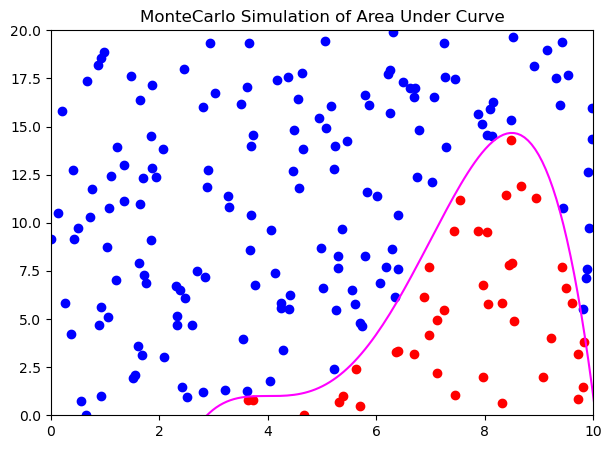

42.0


42.0

In [6]:
Monte_Carlo_HM(f_a, 0, 10, 20)

Now that we have a good model working, we can see how the estimate changes with more points:

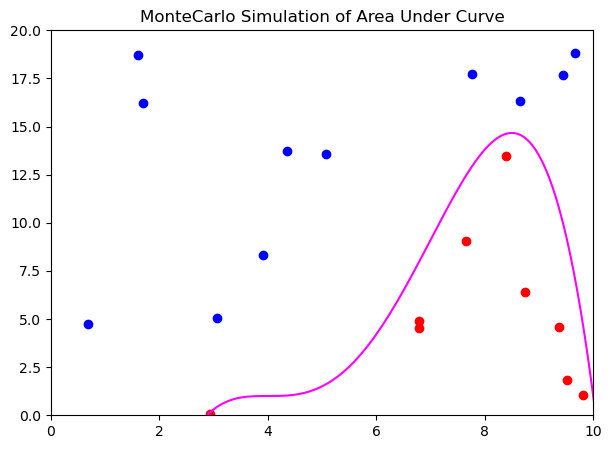

90.0
n_points =  20 
area =  90.0


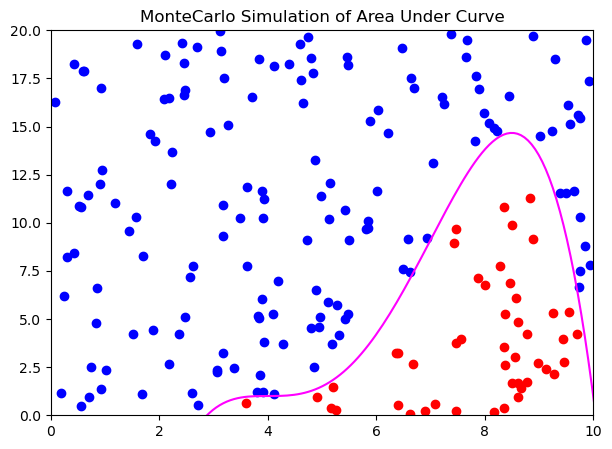

47.0
n_points =  200 
area =  47.0


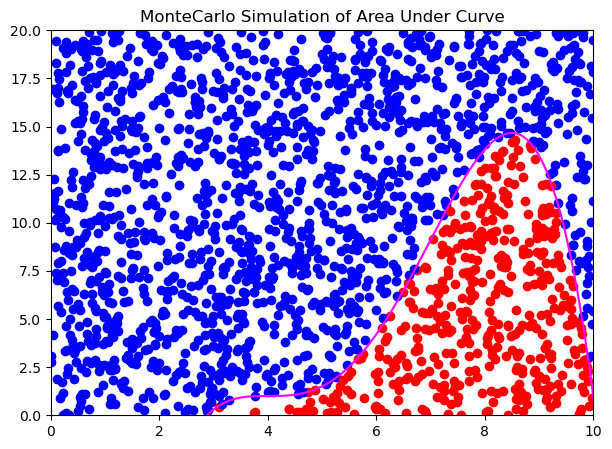

44.2
n_points =  2000 
area =  44.2


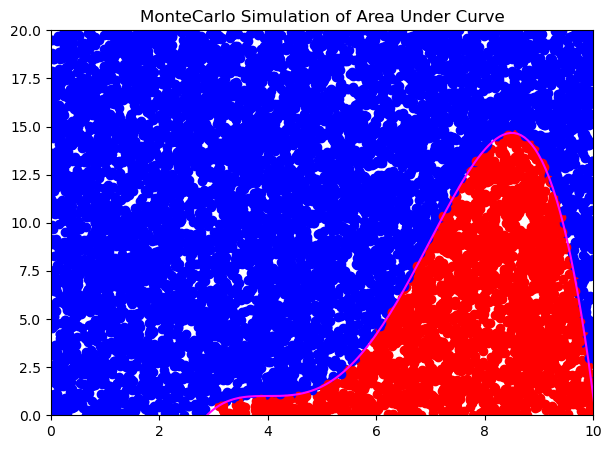

45.019999999999996
n_points =  10000 
area =  45.019999999999996


In [7]:
for n in [20, 200, 2000, 10000]:
    area = Monte_Carlo_HM(f_a, 0, 10, 20, n_points = n)
    print("n_points = ", n, "\narea = ", area)

In [8]:
roots = optimize.root(f_a, [0, 10]).x
true_area = quad(f_a, roots[0], 10)
print("True Area = ", true_area[0])
print("Min_error: ", (true_area[0] - 46.06)/true_area[0])

True Area =  45.72872527923819
Min_error:  -0.007244346277726166


### Monte Carlo Hit-Or-Miss analysis:
As we can see from the procession of npoints above in the Monte_Carlo_HM function, the more points there are the closer the estimated area under the curve is to the true area. In the final simulation with 10000 points, the area value is off by less than 0.5, or  less than 0.01% of the area. 

## Monte Carlo 2D Integration
In this section, I will be implementing a function to simulate Monte Carlo integration over an interval [a, b] as discussed in the README. I will use a similar function as the one above.


In [9]:
def f_b(x):
    return -0.1 *((x-4)**4) + 0.6*((x-4)**3) + 3

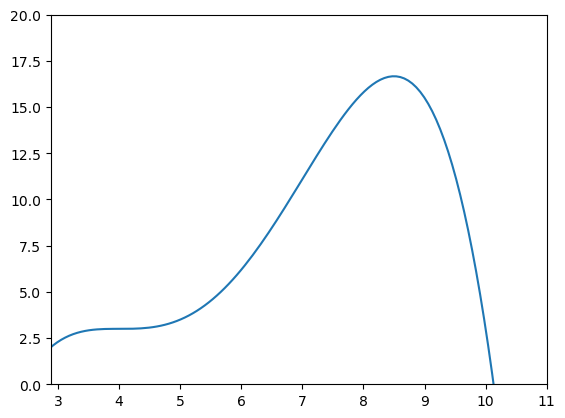

In [10]:
plt.plot(X_a, f_b(X_a))
plt.xlim(roots[0], 11)
plt.ylim(0, 20)
plt.show()

In [11]:
def MonteCarlo2d(func, a, b, n_points = 200, plots = True):
    sum_area = 0
    
    fig, ax = plt.subplots(figsize = [7, 5])
    for xval in range(n_points):
    
        x_rand = a + random.random()*(b - a)
        y_calc = func(x_rand)
        ax.scatter(x_rand, y_calc, color = 'g')
        rect_area = (b-a) * y_calc
        sum_area += rect_area
     
        
    
    if plots == True:
        ax.plot(X_a, f_b(X_a), color = 'magenta')  
        ax.set_title("MonteCarlo Integration of Area Under Curve")
        ax.set_xlim(a, b)
        ax.set_ylim(0, 20)
       
        plt.show()
    
    
    print(sum_area/n_points)
    return sum_area/n_points

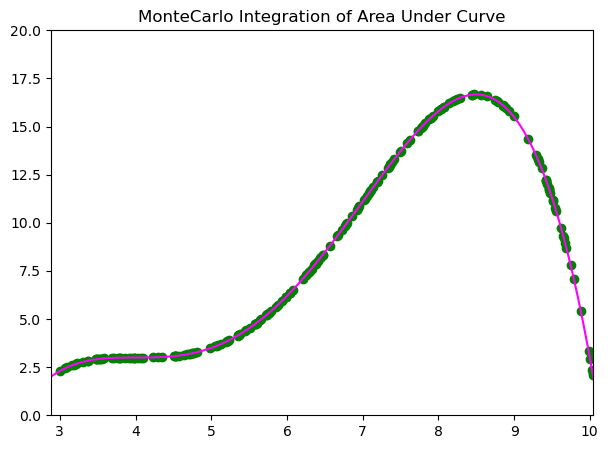

59.22869455800962


In [12]:
area_b = MonteCarlo2d(f_b, roots[0], roots[1])

In [13]:
roots_b = optimize.root(f_b, [0, 10]).x
true_area_b = quad(f_b, roots[0], 10)
print("True Area = ", true_area_b[0])
print("Min_error: ", (true_area_b[0] - area_b)/true_area_b[0])

True Area =  59.96850628554249
Min_error:  0.012336670918735637


With this model, we can also test how the convergence changes over time:


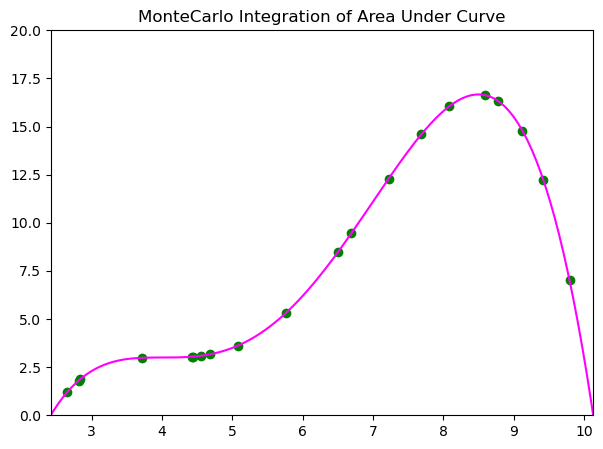

60.50710726562784
Calculated Area:  60.50710726562784
Error %:  -0.008981397294119318


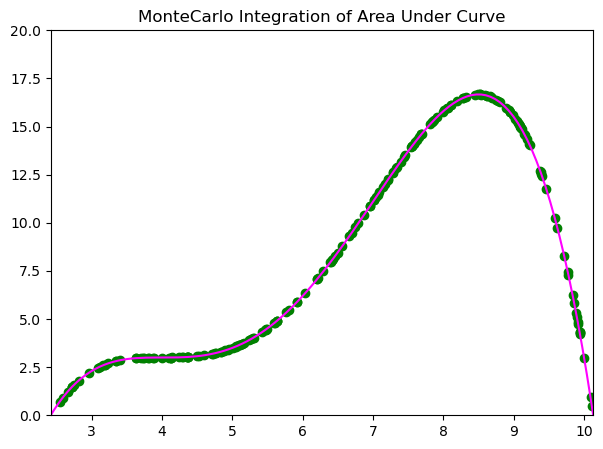

66.33992829691205
Calculated Area:  66.33992829691205
Error %:  -0.10624613494676313


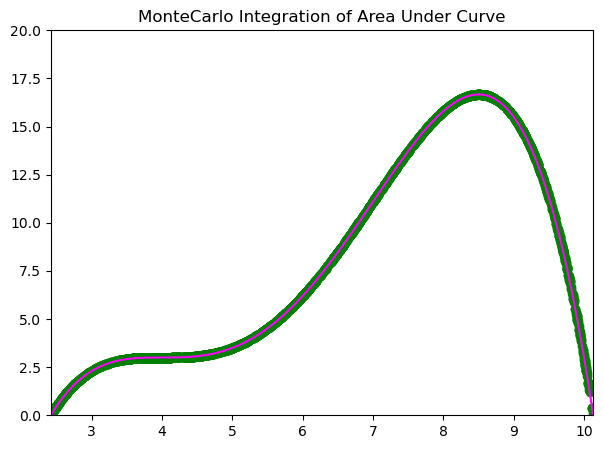

60.81965722769399
Calculated Area:  60.81965722769399
Error %:  -0.01419329903097317


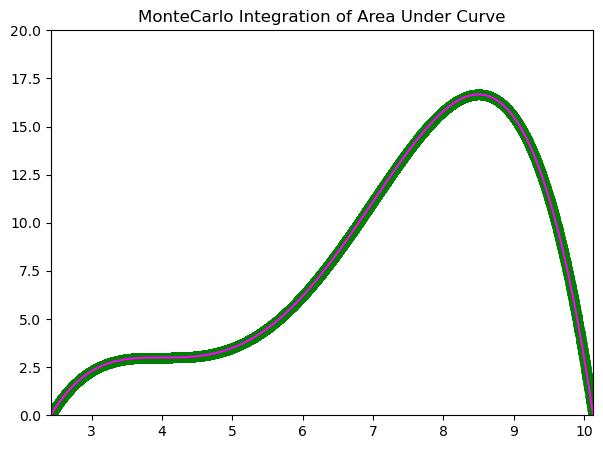

60.58533392399992
Calculated Area:  60.58533392399992
Error %:  -0.010285859639731226


In [14]:
for n in [20, 200, 2000, 10000]:
    ab = MonteCarlo2d(f_b, roots_b[0], roots_b[1], n_points = n)
    print("Calculated Area: ", ab)
    print("Error %: ", (true_area_b[0] - ab)/true_area_b[0])

### Monte Carlo Integration 2d Reflection: 
The plots above illustrate some of the shortcomings and successes of this method of integration. The function I chose to use has fairly steep sections at the beginning and a flatter section at the end where the value of the function is lower. Because each point along the x-axis has the same probability of being chosen, points on a steep section vary more and can cause the Monte Carlo simulation to be more likely to over or underestimate the volume with a lower number of points. If few points are used in the calculation, then a point on the steep part may be much lower or higher than the average. When more points are used to sum the area, there is less variation in the values (f(x)) used to calculate the area.

This points to a shortcoming of the Monte Carlo Integration method, that it works poorly on functions that have many features or fluctuate a lot. 

## Monte Carlo Integration 3D:
In this section, I wanted to explore how well this Integration method works in 3D. In this case, I also wanted to expand this model to use with polar coordinates. My final project in a previous calculus class was to find the integral of the function plotted below... but I did not write down the answer I got! So, I am hoping to use Monte Carlo integration to find out the volume of this 3D polar function.

Because we are working in polar cylindrical coordinates, we will be using cylinders as our estimating blocks as opposed to rectangular prisms or rectangles, as we used in cartesian coordinates. The steps of the algorithm are as follows:
1. Randomly select values for $Z$ and $\Theta$
2. Calculate R using the equation $R = \sin{(2\theta) + (2(Z+10))}* 0.5^{\frac{Z+10}{2}}$
3. Calculate the volume of a cylinder with radius R and height Z
4. Repeat steps 1-3 for n_points
5. Sum all cylinder volumes, divide by n_points to get volume


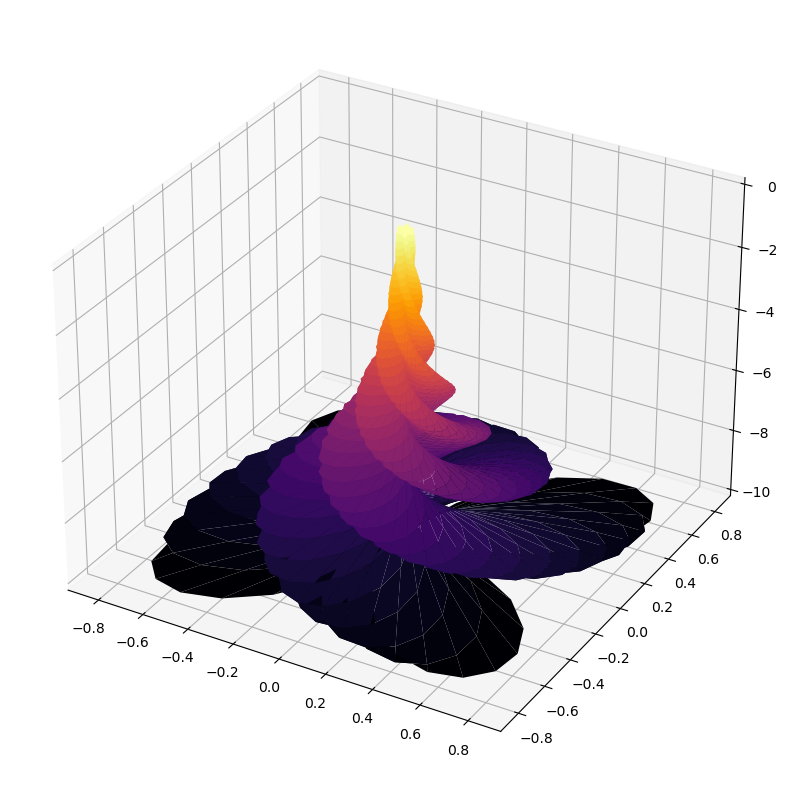

In [57]:
#Display example function
fig = plt.figure(figsize = [10, 10])
ax = fig.add_subplot(projection='3d')

z = np.linspace(0, -10, 50)
t = np.linspace(0, 2*np.pi, 50)
Z, T = np.meshgrid(z, t)
R = np.sin(2*T + 2*(Z+10))*(0.5**((Z+10)/2))

X, Y = R*np.cos(T), R*np.sin(T)

ax.plot_surface(X, Y, Z, cmap='inferno')

ax.set_zlim()

plt.show()




In [48]:
def brooke_func(z, theta):
    return np.sin(2*theta + 2*(z+10))*(0.5**((z+10)/2))

In [78]:
def MonteCarlo3D(func, min_z, max_z, n_points = 200):
    
    fig = plt.figure(figsize = [10, 10])
    ax = fig.add_subplot(projection='3d')
    z2 = np.linspace(0, -10, 50)
    t2 = np.linspace(0, 2*np.pi, 50)
    Z, T = np.meshgrid(z2, t2)
    R = func(Z, T)
    print(R.min())
    X, Y = R*np.cos(T), R*np.sin(T)
    ax.plot_surface(X, Y, Z, alpha = 0.5, cmap='inferno')
    
    sum_vols = 0
    for n in range(n_points):
        z = min_z + (random.random() *(max_z - min_z))
        th = random.random() * (2*np.pi)
        r = func(z, th)
        cyl_vol = z * 2 * np.pi * (r**2)
        sum_vols += cyl_vol
        
        x, y = r*np.cos(th), r * np.sin(th)
        ax.scatter(x, y, z, c = "r")
    return sum_vols/n_points
    

-0.9994862162006881


-3.8717476685028474

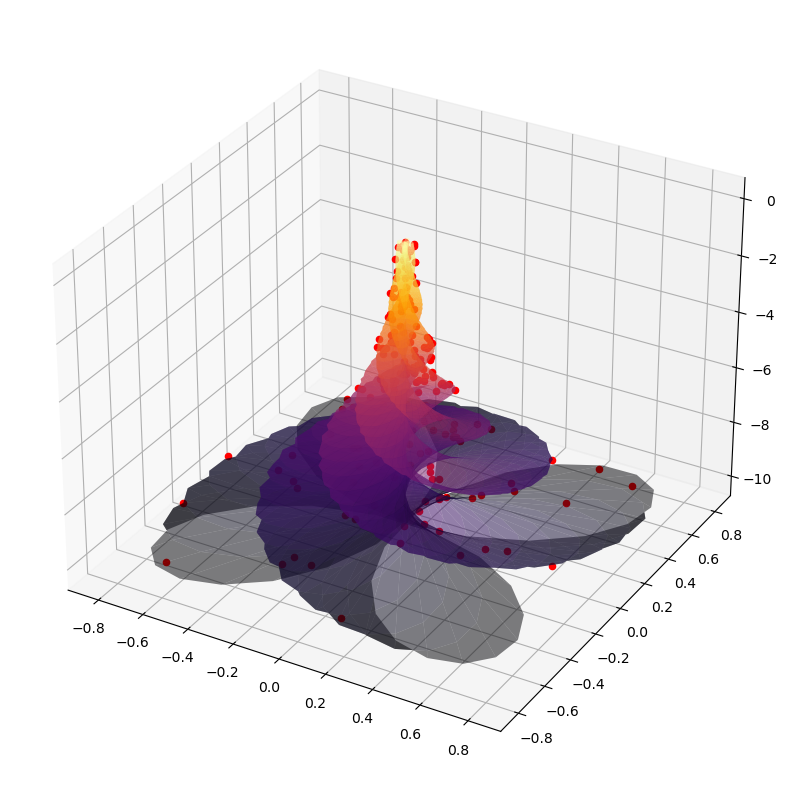

In [79]:
MonteCarlo3D(brooke_func, -10, 0)

In [74]:
from scipy.integrate import dblquad

true_area_3d = dblquad(brooke_func, -10, 0, 0, 2 * np.pi)
print("True Area = ", true_area_3d[0])

True Area =  0.006829634754489974


True Area =  0.006829634754489974
Calc Area =  -2.1593246375668658
True Area =  0.006829634754489974
Calc Area =  -3.337140448927422
True Area =  0.006829634754489974
Calc Area =  -4.057529027347751
True Area =  0.006829634754489974
Calc Area =  -3.850735880797895


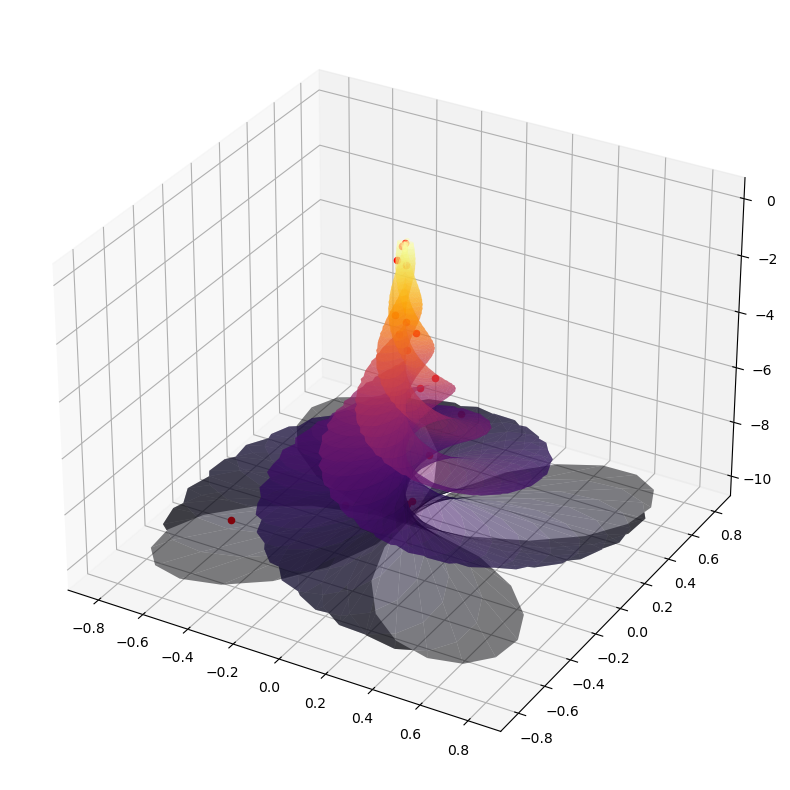

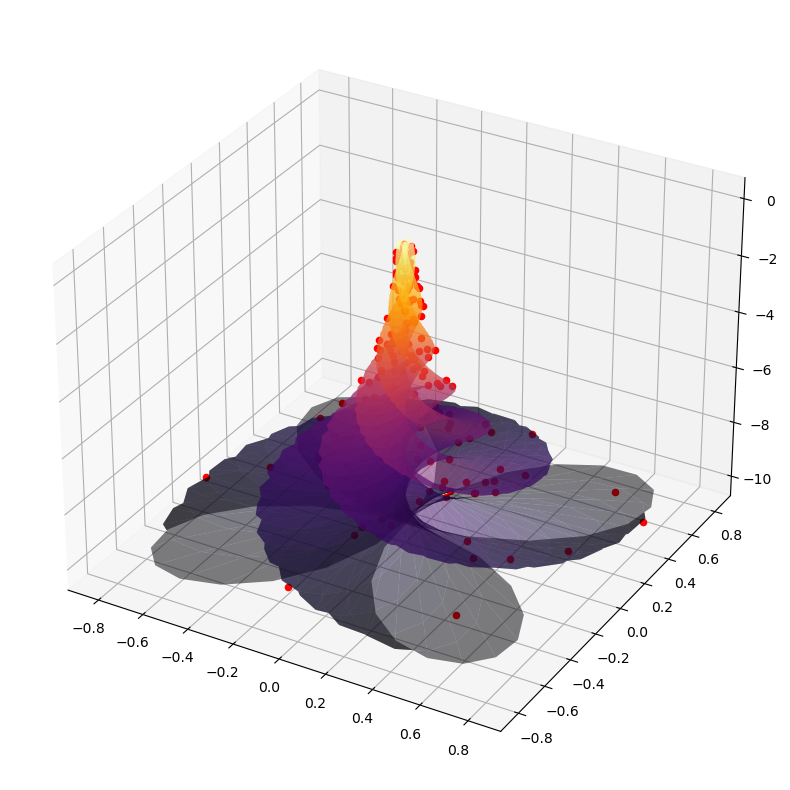

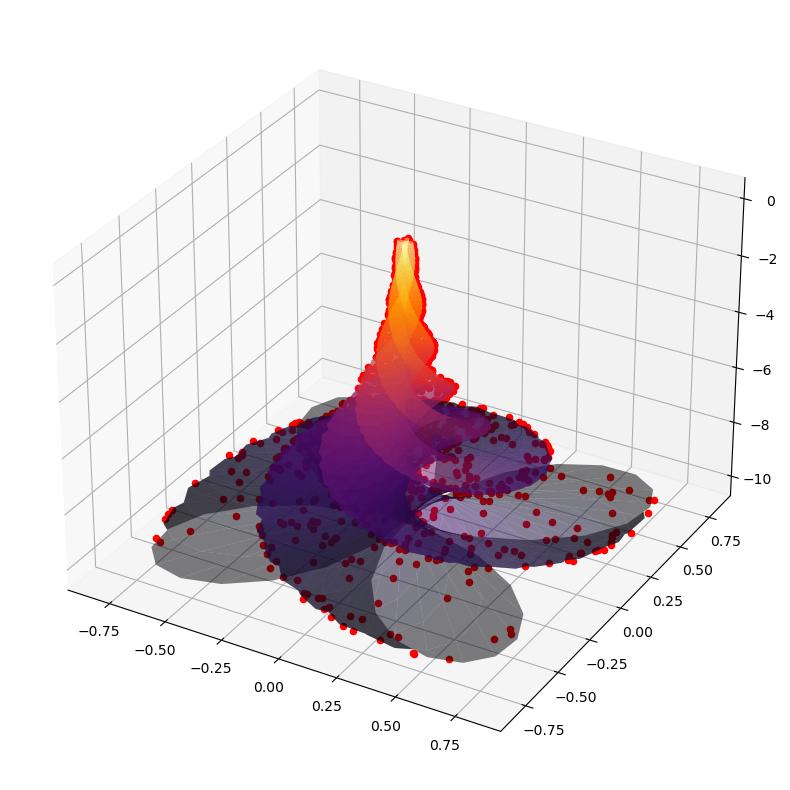

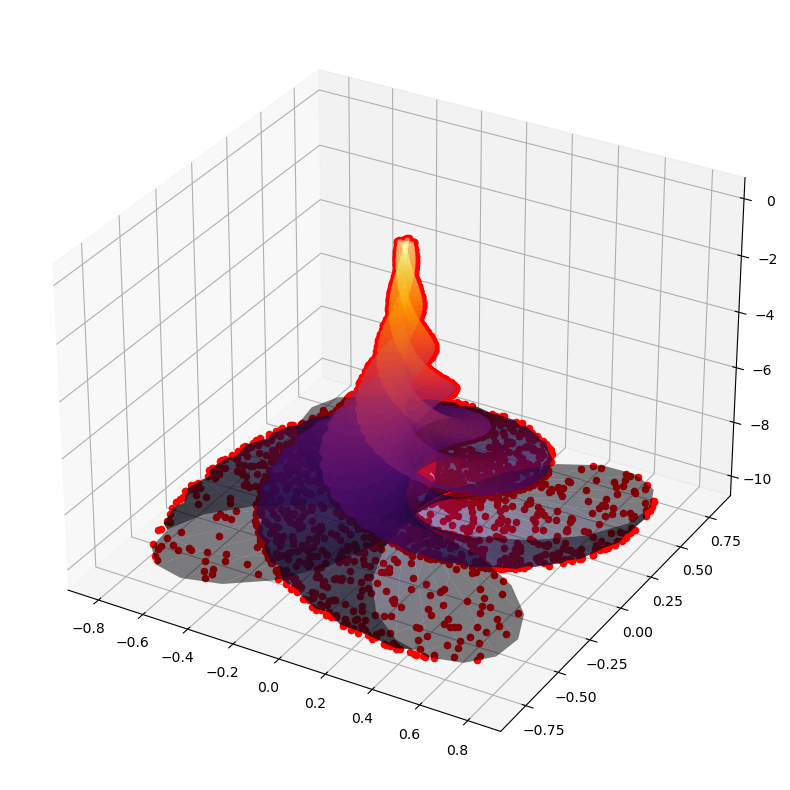

In [75]:
for n in [20, 200, 2000, 10000]:
    calc_vol = MonteCarlo3D(brooke_func, -10, 0, n_points = n)
    print("True Area = ", true_area_3d[0])
    print("Calc Area = ", calc_vol)
    #print("Min_error: ", (true_area_3d[0] - calc_vol)/true_area_3d[0])
    
    

### Monte Carlo 3D reflection
In this instance, the Monte Carlo integration gave a different value than the true volume calculated using integration via SciPy. After some consideration, I realized that this was likely due to the way that the volumes are calculated. The Monte Carlo Approximation calculates all of the cylinders with negative z values (set due to the range of the function) and positive R values, which means that all of the volumes that are averaged are negative. However, the range of R as calculated using the function above is -1 to 1, so some of the volumes calculated in integration are likely distributed around 0. So although the integral is calculating the integral of the function, I think that the Monte Carlo integration is calculating the total volume under the surface plotted above, which was my goal for the project originally! 

To make this match with the SciPy integral, I think I would need to just make the cylinders with $\theta$ between ($\frac{\pi}{2}$ and $\pi$) and ($\frac{3\pi}{2}$ and $2\pi$) have negative values.

## Overall Reflection on Monte Carlo Integration
Overall, I think that this is a very interesting way to approach integration. The 2d functions were well approximated by the Monte Carlo method without any modification, but for the 3D function in polar coordinates, special considerations need to be taken to ensure that the value of the integrations stay the same or actually approximate the integral rather than the volume inside the surface. 

I was surprised to find that the algorithm for the 3D model ran just as fast as the 2d model. Usually I expect 3d plotting and calculations to take more time than the 2d equivalents. I think this was an interesting way to show that the Monte Carlo method of Integration does not suffer from the curse of dimensionality, unlike other numerical integration methods. 